In [26]:
import os
import itertools

import folium
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline


## Municípios

In [27]:
municipios = pd.DataFrame()
municipios_path = os.path.relpath('../data/municipios')

municipios_files = [x for x in os.walk(municipios_path)][0][2]
for file in municipios_files:
    if not 'municipios' in file:
        continue
    municipios = municipios.append(pd.read_csv(os.path.join(municipios_path, file)))

In [46]:
municipios.head()

ano_censo   regiao unidade_federativa mesoregiao microregiao  \
0       2015  Sudeste          São Paulo      Assis       Assis   
1       2015  Sudeste          São Paulo      Assis       Assis   
2       2015  Sudeste          São Paulo      Assis       Assis   
3       2015  Sudeste          São Paulo      Assis       Assis   
4       2015  Sudeste          São Paulo      Assis       Assis   

               municipio  cod_municipio  num_escolas  \
0                 Nantes        3532157            3   
1                 Tarumã        3553955           10   
2               Cruzália        3513306            5   
3  Campos Novos Paulista        3509809            3   
4                  Assis        3504008           75   

   num_escolas_em_atividade  num_estudantes_ensino_infantil     ...      \
0                         3                             167     ...       
1                        10                             971     ...       
2                         3                             103     ...       
3                         3                             202     ...       
4                        70                            5052     ...       

   num_computador  num_comp_administrativo  num_comp_aluno  num_funcionarios  \
0               3                        3               1                89   
1              10                       10               8               458   
2               3                        3               1                54   
3               3                        3               3               133   
4              68                       66              53              3288   

   num_escolas_rurais  num_escolas_urbanas  num_professores  num_matriculas  \
0                   0                    0               44             782   
1                   0                    0              257            3880   
2                   0                    0               44             590   
3                   0                    0               77            1131   
4                   0                    0             1417           25237   

   num_estudantes  num_turmas  
0             676          45  
1            3473         181  
2             405          37  
3            1015          61  
4           22096        1134  

[5 rows x 51 columns]

In [101]:
ideb = pd.DataFrame()
ideb_path = os.path.relpath('../data/ideb')

ideb_files = [x for x in os.walk(ideb_path)][0][2]

for file in ideb_files:
    if not 'ideb' in file:
        continue
    ideb = ideb.append(pd.read_csv(os.path.join(ideb_path, file), encoding='latin1', na_values=['-','ND']))

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (62,63,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (64,65,67,68,70,71,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (58,59,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (60,61,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compi

In [102]:
#ideb.Ideb2005 = ideb.Ideb2005.replace('-',0)

In [103]:
#ideb.Ideb2005.astype('float')
ideb.head()

Co_UF  Cod_Escola_Completo  Cod_Municipio_Completo  Ideb2005  Ideb2007  \
0    RO                  NaN               1100015.0       3.5       3.9   
1    RO                  NaN               1100015.0       NaN       NaN   
2    RO                  NaN               1100015.0       3.7       4.0   
3    RO                  NaN               1100023.0       4.0       4.3   
4    RO                  NaN               1100023.0       3.5       3.7   

   Ideb2009  Ideb2011  Ideb2013  Ideb2015  Ideb2017   ...    \
0       4.3       4.2       5.3       5.8       6.2   ...     
1       NaN       NaN       NaN       5.0       5.1   ...     
2       4.5       4.3       5.4       5.8       6.2   ...     
3       4.9       4.9       5.2       5.6       6.0   ...     
4       4.2       4.4       4.8       5.0       5.4   ...     

   TaxaAprovacao2017_2ano  TaxaAprovacao2017_3ano  TaxaAprovacao2017_4ano  \
0                    95.2                    89.9                    89.6   
1                    98.6                   100.0                    89.1   
2                    98.4                    95.4                    89.4   
3                   100.0                    84.3                    93.4   
4                    98.9                    83.4                    88.6   

   TaxaAprovacao2017_5ano  TaxaAprovacao2017_6ano  TaxaAprovacao2017_6ao9ano  \
0                    94.5                     NaN                        NaN   
1                    91.5                     NaN                        NaN   
2                    93.5                     NaN                        NaN   
3                    90.7                     NaN                        NaN   
4                    88.3                     NaN                        NaN   

   TaxaAprovacao2017_7ano TaxaAprovacao2017_8ano TaxaAprovacao2017_9ano  \
0                     NaN                    NaN                    NaN   
1                     NaN                    NaN                    NaN   
2                     NaN                    NaN                    NaN   
3                     NaN                    NaN                    NaN   
4                     NaN                    NaN                    NaN   

   UF_REG  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 127 columns]

In [123]:
municipios_ideb = pd.merge(municipios, ideb, left_on='cod_municipio' , right_on='Cod_Municipio_Completo')
municipios_ideb.head()
#municipios_ideb.Ideb2005.astype('float')
(municipios_ideb.num_escolas_rurais != 0).sum()

0

## Matriz de correlação

In [105]:
plt.rcParams['figure.figsize'] = [20,20]

In [109]:
corr = municipios_ideb.corr()

ano_censo  num_escolas  \
ano_censo                                  1.000000     0.006196   
num_escolas                                0.006196     1.000000   
num_escolas_em_atividade                  -0.000639     0.998123   
num_estudantes_ensino_infantil             0.007183     0.990717   
num_estudantes_ensino_fund_anos_iniciais  -0.000622     0.994149   

                                          num_escolas_em_atividade  \
ano_censo                                                -0.000639   
num_escolas                                               0.998123   
num_escolas_em_atividade                                  1.000000   
num_estudantes_ensino_infantil                            0.991705   
num_estudantes_ensino_fund_anos_iniciais                  0.996225   

                                          num_estudantes_ensino_infantil  \
ano_censo                                                       0.007183   
num_escolas                                                     0.990717   
num_escolas_em_atividade                                        0.991705   
num_estudantes_ensino_infantil                                  1.000000   
num_estudantes_ensino_fund_anos_iniciais                        0.990477   

                                          num_estudantes_ensino_fund_anos_iniciais  \
ano_censo                                                                -0.000622   
num_escolas                                                               0.994149   
num_escolas_em_atividade                                                  0.996225   
num_estudantes_ensino_infantil                                            0.990477   
num_estudantes_ensino_fund_anos_iniciais                                  1.000000   

                                          num_estudantes_ensino_fund_anos_finais  \
ano_censo                                                              -0.005630   
num_escolas                                                             0.992145   
num_escolas_em_atividade                                                0.994551   
num_estudantes_ensino_infantil                                          0.982330   
num_estudantes_ensino_fund_anos_iniciais                                0.998214   

                                          num_estudantes_ensino_medio_propedeutico  \
ano_censo                                                                 0.003139   
num_escolas                                                               0.991940   
num_escolas_em_atividade                                                  0.994233   
num_estudantes_ensino_infantil                                            0.995032   
num_estudantes_ensino_fund_anos_iniciais                                  0.997260   

                                          num_estudantes_fund_1_ano  \
ano_censo                                                 -0.001343   
num_escolas                                                0.994692   
num_escolas_em_atividade                                   0.996617   
num_estudantes_ensino_infantil                             0.991017   
num_estudantes_ensino_fund_anos_iniciais                   0.999787   

                                          num_estudantes_fund_2_ano  \
ano_censo                                                  0.001508   
num_escolas                                                0.993340   
num_escolas_em_atividade                                   0.995562   
num_estudantes_ensino_infantil                             0.992230   
num_estudantes_ensino_fund_anos_iniciais                   0.999388   

                                          num_estudantes_fund_3_ano  \
ano_censo                                                 -0.001363   
num_escolas                                                0.993285   
num_escolas_em_atividade                                   0.995661   
num_estudantes_ensino_infantil                             0.988499   
num_est

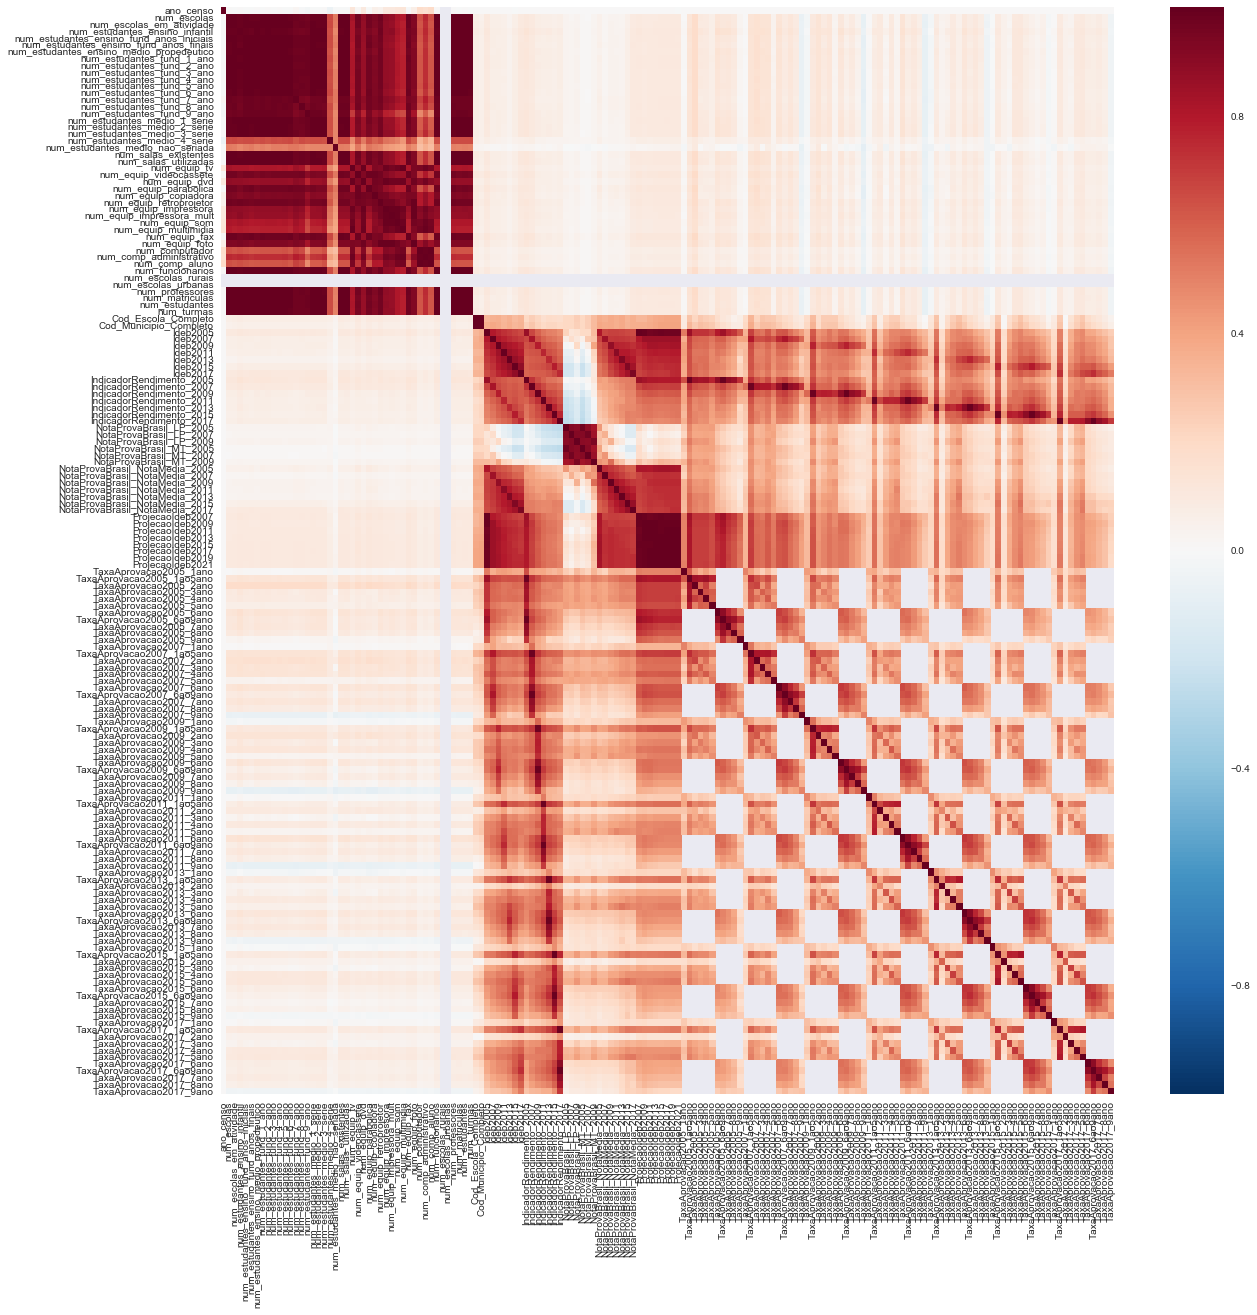

In [116]:
corr = (corr)
ax = sns.heatmap(corr, 
            vmin=-1,
            vmax=1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdBu_r", center=0)

In [112]:
corr_1 = corr.iloc[0:40,0:40]

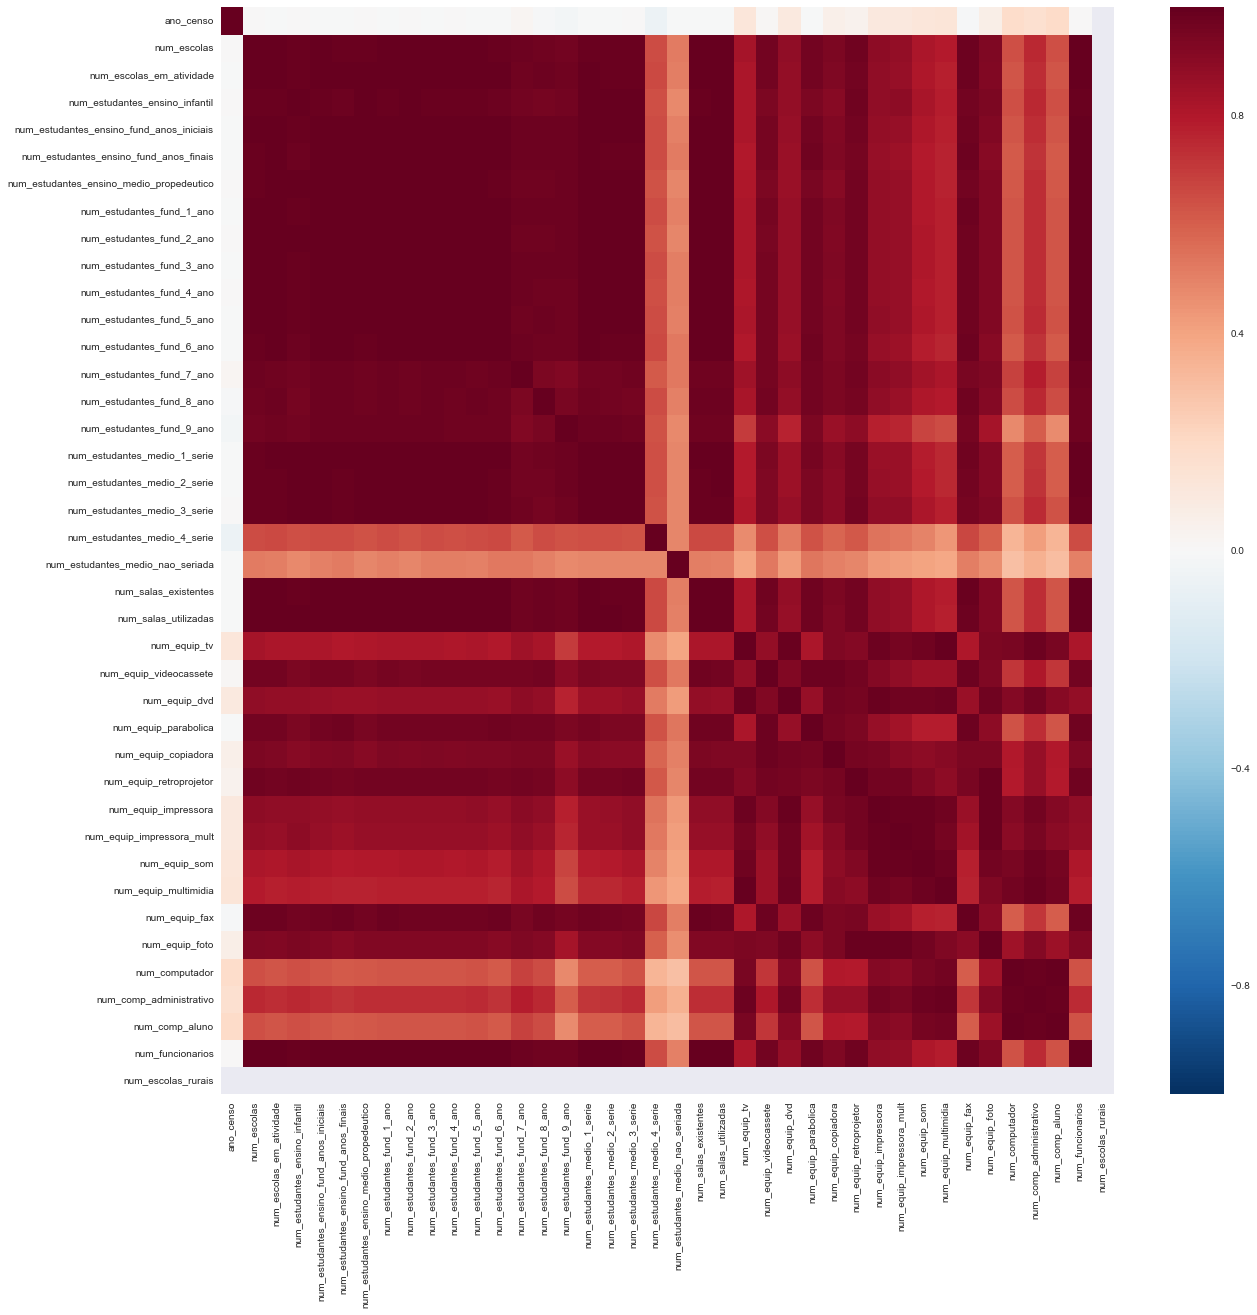

In [113]:

corr_1 = (corr_1)
ax = sns.heatmap(corr_1, 
            vmin=-1,
            vmax=1,
            xticklabels=corr_1.columns.values,
            yticklabels=corr_1.columns.values,
            cmap="RdBu_r", center=0)


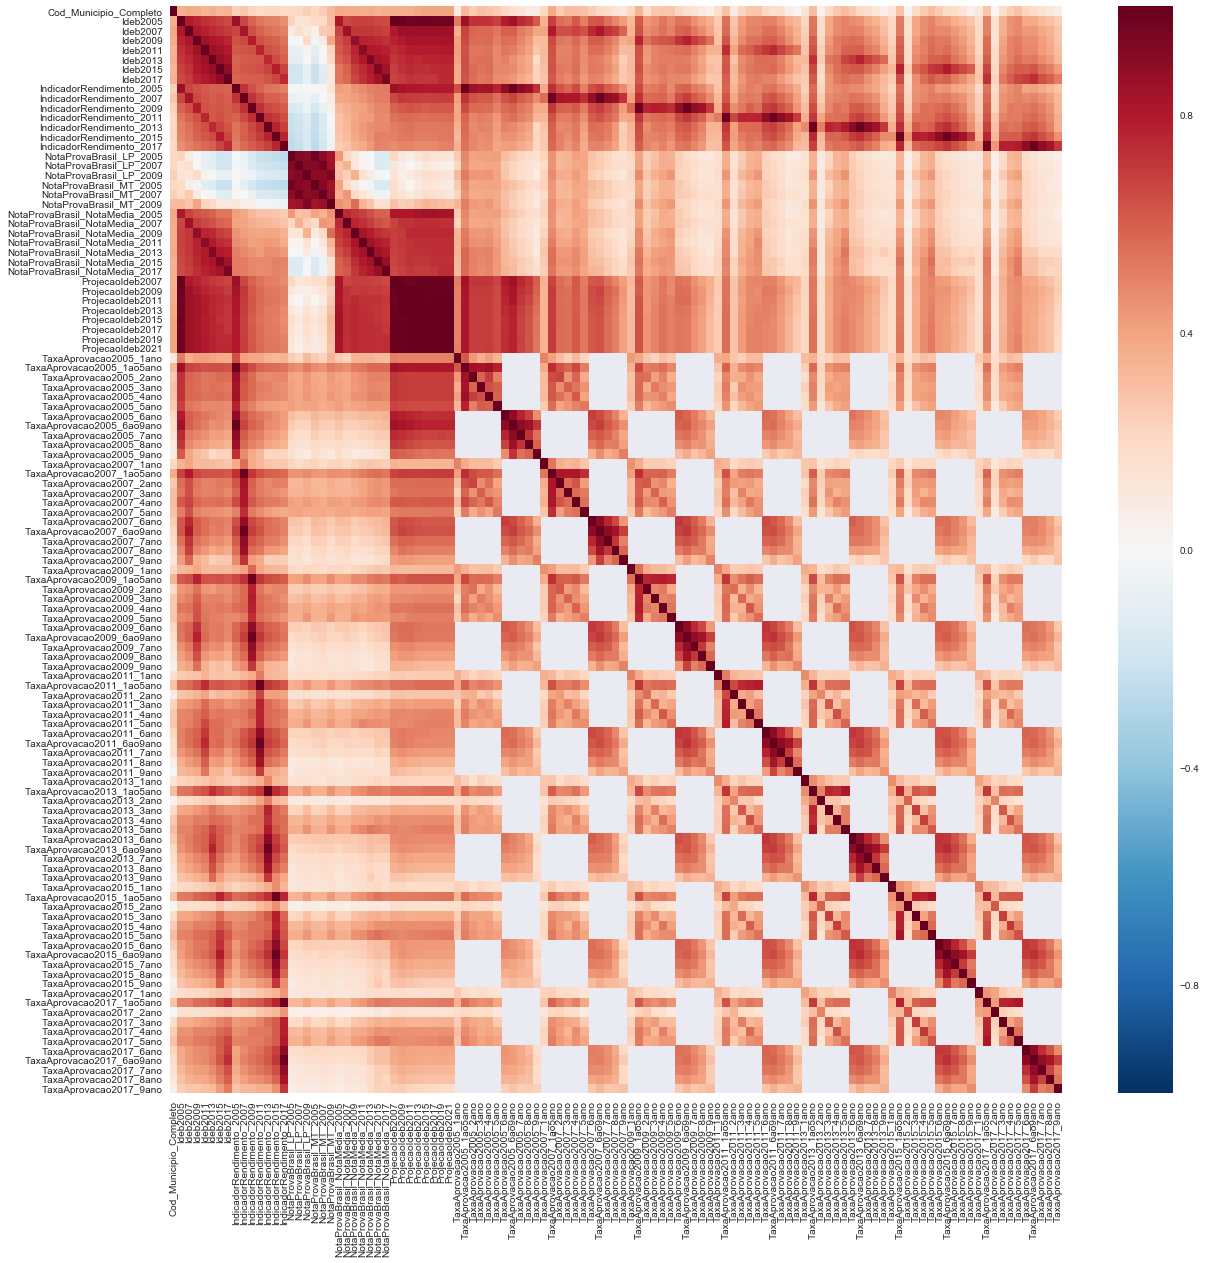

In [126]:
corr_2 = corr.iloc[46:,46:]

corr_2 = (corr_2)
sns.heatmap(corr_2, 
            vmin=-1,
            vmax=1,
            xticklabels=corr_2.columns.values,
            yticklabels=corr_2.columns.values,
            cmap="RdBu_r", center=0)

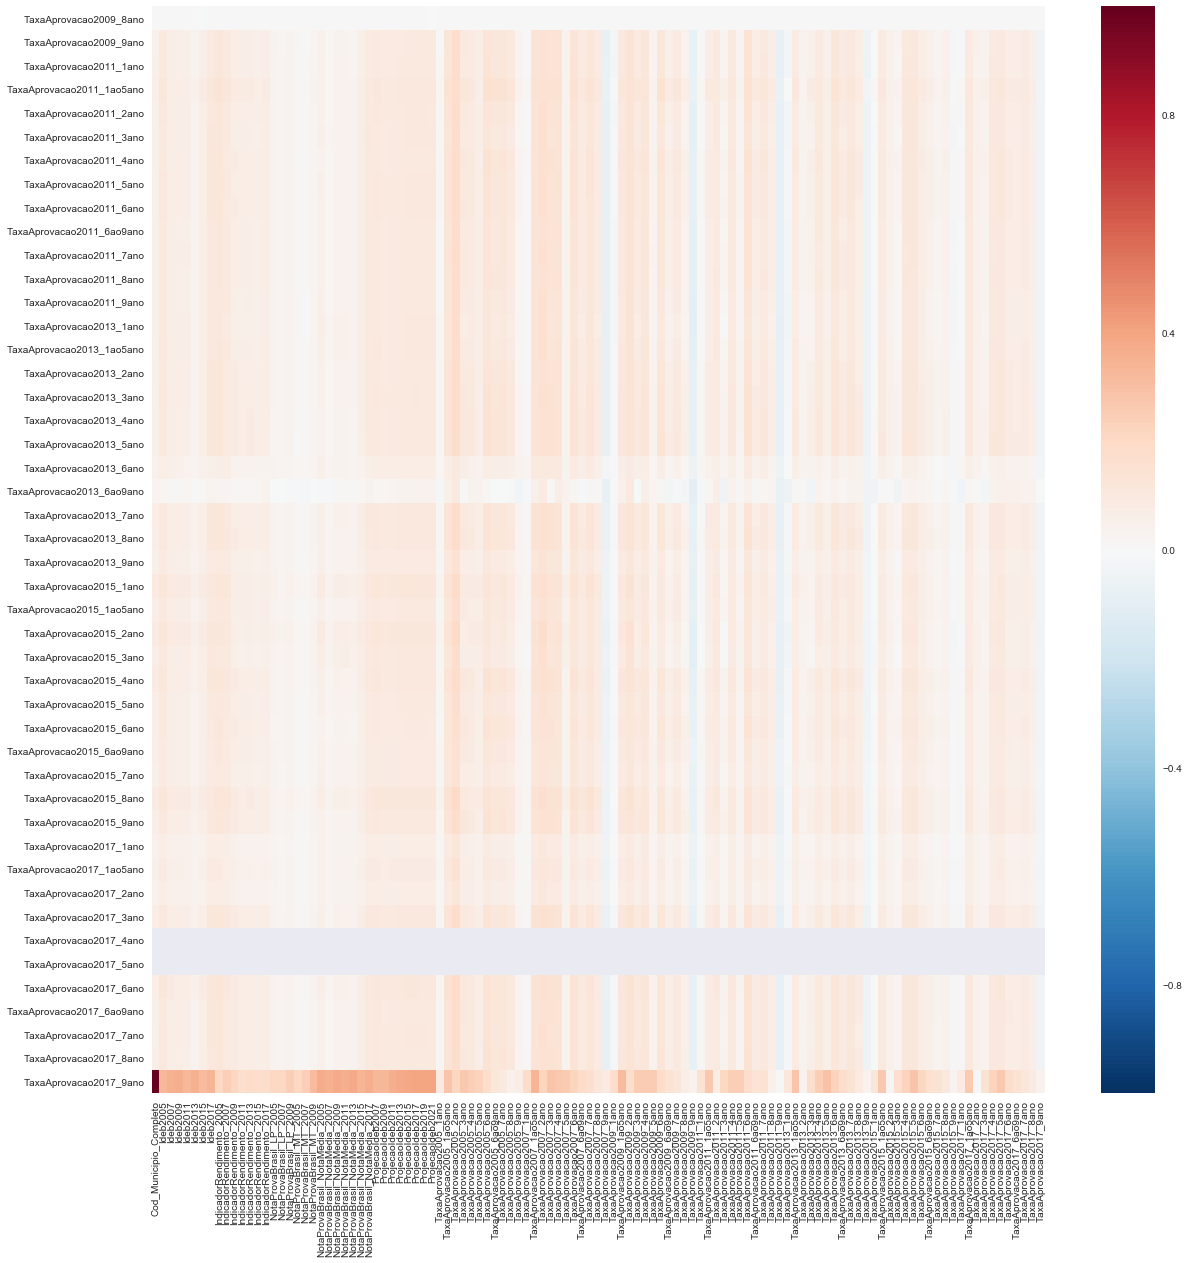

In [128]:
corr_3 = corr.iloc[:46,46:]

corr_3 = (corr_3)
sns.heatmap(corr_3, 
            vmin=-1,
            vmax=1,
            xticklabels=corr_3.columns.values,
            yticklabels=corr_3.columns.values,
            cmap="RdBu_r", center=0)

